In [15]:
# ln -s ../code/analytic.py analytic.py
%matplotlib inline

import numpy as np
import math

import nsfg
import first
import thinkstats2
import thinkplot
import brfss
import scatter

In [17]:
df = brfss.ReadBrfss(nrows=None)
sample = thinkstats2.SampleRows(df, 5000)
heights,weights = sample.htm3, sample.wtkg2

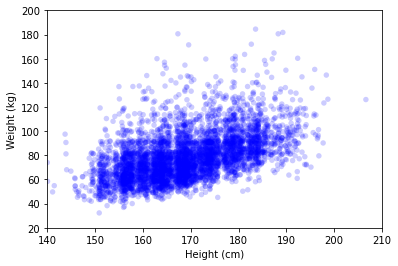

<Figure size 576x432 with 0 Axes>

In [19]:
thinkplot.Scatter(heights, weights, alpha=0.2)
thinkplot.Show(xlabel='Height (cm)', ylabel='Weight (kg)',
               axis=[140,210,20,200])

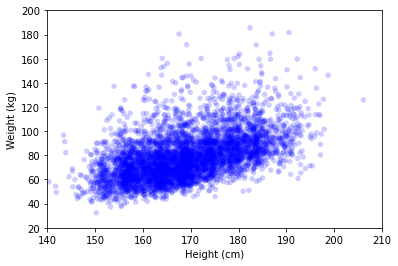

<Figure size 576x432 with 0 Axes>

In [21]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.uniform(-jitter, +jitter, n) + values

heights = Jitter(heights, 1.3)
weights = Jitter(weights, 1.3)

thinkplot.Scatter(heights, weights, alpha=0.2)
thinkplot.Show(xlabel='Height (cm)', ylabel='Weight (kg)',
               axis=[140,210,20,200])

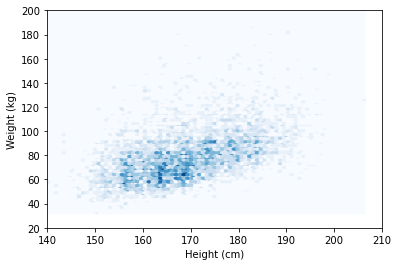

<Figure size 576x432 with 0 Axes>

In [23]:
thinkplot.HexBin(heights, weights)
thinkplot.Show(xlabel='Height (cm)', ylabel='Weight (kg)',
               axis=[140,210,20,200])

In [36]:
df2 = df.dropna(subset=['htm3','wtkg2'])
bins = np.arange(135, 210, 5)
indices = np.digitize(df2.htm3, bins)
groups = df2.groupby(indices)

for i, group in groups:
    print(i, len(group))

0 305
1 228
2 477
3 2162
4 18759
5 45761
6 70610
7 72138
8 61725
9 49938
10 43555
11 20077
12 7784
13 1777
14 405
15 131


In [37]:
heights = [group.htm3.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.wtkg2) for i,group in groups]

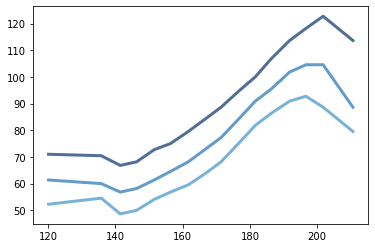

In [40]:
for percent in [75,50,25]:
    weights=[cdf.Percentile(percent) for cdf in cdfs]
    label = f'{percent}th'
    thinkplot.Plot(heights, weights, label=label)

## Correlation

It's a statistic intended to quantify the strength of the relationship between two variables. To ensure consistency across units:
- Transform each value to a ^^standard score**. This transform leads to the Pearson's product-moment correlation coefficient
- transform each value to its **rank**. Leads to the Spearman rank correlation coefficient

## Covariance

Measure of the tendency of two variables to vary together. $$Cov(X,Y)=\frac{1}{n}\sum{(x_i-\bar{x})(y_i-\bar{y})}$$

 ## Pearson's correlation

 Brings context to covariance by standardizing: $$\rho=\frac{1}{n}\sum\frac{(x_i-\bar{x})}{S_X}\frac{(y_i-\bar{y})}{S_Y}=\frac{Cov(X,Y)}{S_X S_Y}$$